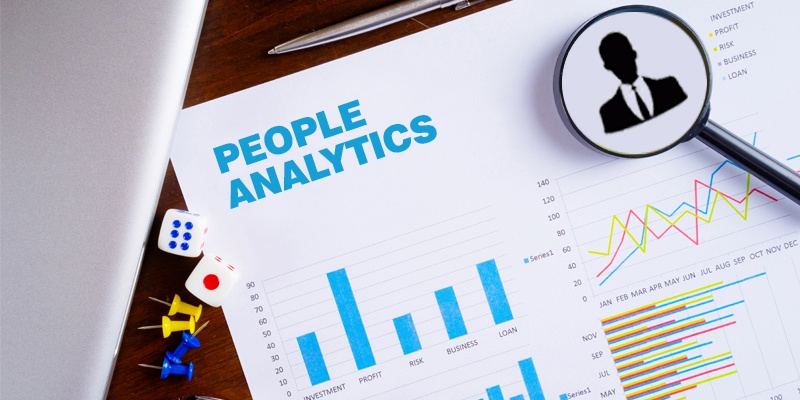

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

# Load Data

In [ ]:
data = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')

In [ ]:
data.head()

# Pre-processing

In [ ]:
data.shape

In [ ]:
data.info

In [ ]:
data.describe()

In [ ]:
data.columns

In [ ]:
data.dtypes

# Check Missing Values

In [ ]:
data.isnull().sum()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

# Cehck Unique Values

In [ ]:
for i in data.columns:
    print("There are {}  unique values in {} column \n Values are: {}".format(len(data[i].unique()),i,data[i].unique()))
    print('\n')

# Extract Categorical Columns

In [ ]:
cat_cols = []
for i in data.columns:
    if data[i].dtypes == 'object':
        cat_cols.append(i)

In [ ]:
cat_cols

# Extract Numerical Columns

In [ ]:
num_cols = []
for i in data.columns:
    if i not in cat_cols:
        num_cols.append(i)

In [ ]:
cat_cols

In [ ]:
# Function to plot pie chart

def plot_pie_chart(column, title=''):
    values = data[column].value_counts().values
    labels = data[column].value_counts().index
    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.pie(x=values, labels=labels, autopct='%1.2f%%')
    
    
# Function to plt bar chart

def bar_chart(columns, order=None):
    x = data[columns].value_counts().index
    y = data[columns].value_counts().values
    sns.barplot(x,y, order=order)

# Univariate Exploratory Data Analysis

1) Pie Char for Gender

In [ ]:
plot_pie_chart('gender', title='Pie Chart For Gender')
plt.show()

As we can see that most of the candidates working are male 

 2) Bar chart for relevent_experience Column

In [ ]:
bar_chart('relevent_experience')

Most of the candidates has relevvent experience

3) pie chart for education_level 

In [ ]:
plot_pie_chart('education_level')

As we can see that most of the candidates have Graduate Degree

4) Bar chart for major_discipline

In [ ]:
bar_chart('major_discipline')

Most of the Candidates are from STEM.
STEM stands for:
1. Science
2. Technology
3. Engineering
4. Mathematics

5) barchart for company_size column

In [ ]:
plt.figure(figsize=(8,4))
order= ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
bar_chart('company_size',order)
plt.show()

6) How many Jobs Candidates Worked before joining the current company

In [ ]:
order = ['never', '1', '2', '3', '4', '>4']
bar_chart('last_new_job', order=order)

# Bivariate Exploratory Data Analysis

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data['training_hours'], kde=True)

In [ ]:
num_cols

Relation ship between training hour and target

In [ ]:
sns.lineplot(x='target', y='training_hours', data=data)
plt.show()

Now we will check relation between few features and Training Hours, as people looking for a Job Change tend to Train for longer hours.

1. Relevent Experience vs Training Hours
2. Education Level vs Training Hours
3. Major Discipline vs Training Hours
4. Company Size vs Training Hours
5. Company Type vs Training Hours
6. Last New Job vs Training Hours

In [ ]:
figures, axes = plt.subplots(3, 2, figsize=(16, 14))

sns.scatterplot('relevent_experience', 'training_hours', data=data, hue='target', ax=axes[0,0])
sns.scatterplot('education_level', 'training_hours', data=data, hue='target', ax=axes[0,1])
sns.scatterplot('major_discipline', 'training_hours', data=data, hue='target', ax=axes[1,0])
sns.scatterplot('company_size', 'training_hours', data=data, hue='target', ax=axes[1,1])
sns.scatterplot('company_type', 'training_hours', data=data, hue='target', ax=axes[2,0])
sns.scatterplot('last_new_job', 'training_hours', data=data, hue='target', ax=axes[2,1])

plt.show()

In [ ]:
sns.pointplot(x='relevent_experience', y='training_hours', hue='target',data=data)

# Multivariate Exploratory Analysis

In [ ]:
sns.pairplot(data=data, hue='training_hours')